In [5]:
def to_yuv(rgb):
    y = .299 * rgb[0] + .587 * rgb[1] + .114 * rgb[2]
    u = .492 * (rgb[2] - y)
    v = .877 * (rgb[0] - y)
    return (y,u,v)


def to_rgb(yuv):
    return (yuv[0] + 1.14 * yuv[2], yuv[0] - .394 * yuv[1] - .581 * yuv[2], yuv[0] + 2.032 * yuv[1])


In [32]:
to_yuv([0,0,97]), to_yuv([1,1,98]), to_yuv([156,156,253]), to_yuv([158,158,255])

((11.058, 42.283464, -9.697866),
 (12.058, 42.283464, -9.697866),
 (167.058, 42.283464, -9.697865999999994),
 (169.058, 42.283464, -9.697865999999994))

# YUV example

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def rgb_2_yuv(img):
    shape = img.shape
#     matrix = np.array([[1, 0, 1.2], [1, -.2, -.38], [1, 2.12, 0]])
    matrix = np.array([[.299, .58, .114], [-.14, -.28, .436], [.61, -.515, -.1]])
    return np.matmul(matrix, img.reshape(-1, 3).T).T.reshape(*shape)

def yuv_2_rgb(img):
    shape = img.shape
#     matrix = np.array([[0.2, .715, .07], [-0.09, -0.03, .436], [.615, -.55, -0.5]])
    matrix = np.array([[1, 0, 1.14], [1, -0.39, -.581], [1, 2.03, 0]])
    return  np.clip(np.matmul(matrix, img.reshape(-1, 3).T).T.reshape(*shape), 0, 1)
    

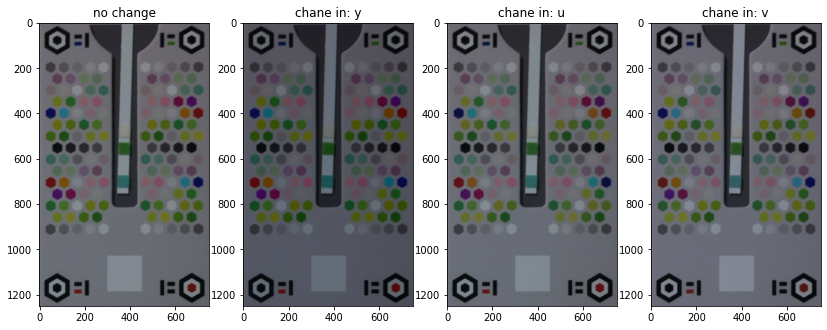

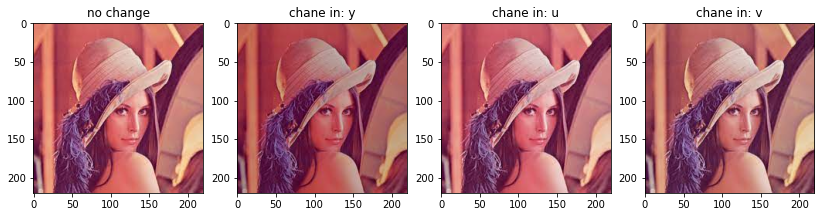

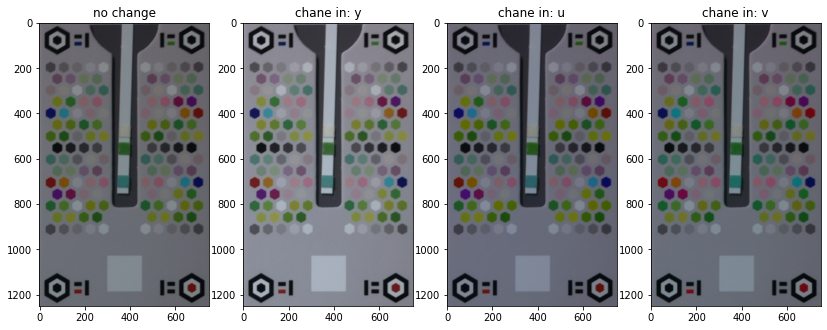

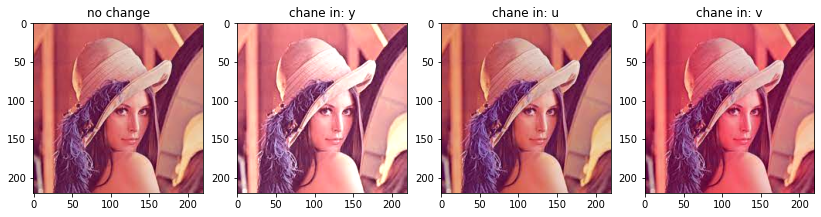

In [150]:
# change_value = 1.3
change_values = [.8, 1.3]

paths = ["/home/yuvalj/Data/acr/good/0_rec.png", "/home/yuvalj/Downloads/lena.jpeg"]

for change_value in change_values:
    for p in paths:
        img = cv2.imread(p)[:,:,::-1]
        img_yuv = rgb_2_yuv(img / 255)

        _, ax = plt.subplots(1,4,figsize=(14,7))
        ax[0].imshow(img)
        ax[0].set_title("no change")
        for i in range(3):

        #     _, ax = plt.subplots(1,2,figsize=(7,7))
        #     ax[0].imshow(img)

            yuv_arr = cv2.split(img_yuv)
        #     print(i, np.max(yuv_arr[i]), np.min(yuv_arr[i]))
        #     yuv_arr[i] += change_value / 255

            yuv_arr[i] *= change_value

            ax[i + 1].set_title("chane in: " + 'yuv'[i])
        #     plt.imshow(cv2.merge(yuv_arr))

            new_img = yuv_2_rgb(cv2.merge(yuv_arr))
            ax[i + 1].imshow(new_img)
        plt.show()

# plt.imshow(y, cmap='gray')
# plt.show()
# plt.imshow(u, cmap='gray')
# plt.show()
# plt.imshow(v, cmap='gray')
# plt.show()